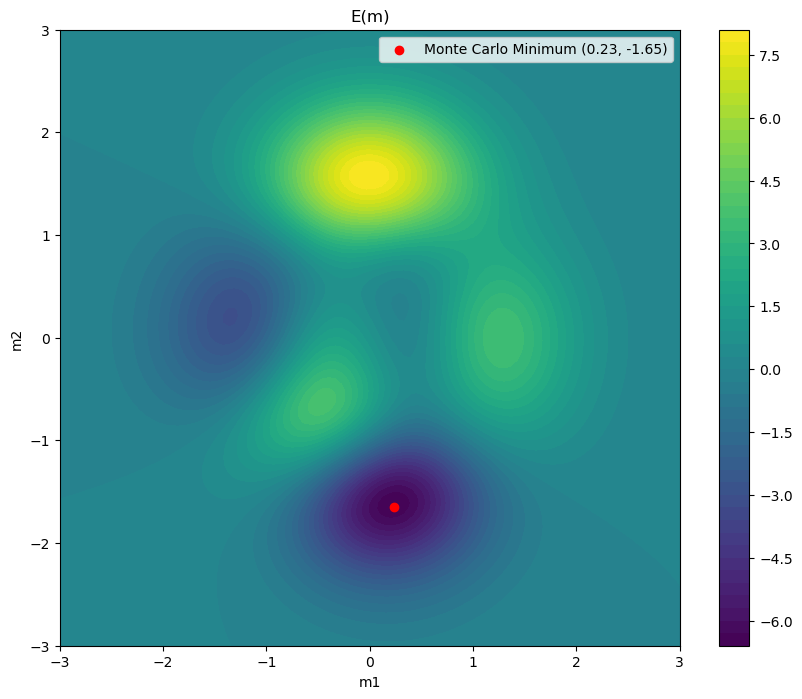

The minimum from Monte Carlo search is at m1 = 0.2308, m2 = -1.6519 with a value of -6.5409


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to optimize
def fun(m1, m2):
    return (3 * (1 - m1)**2 * np.exp(-(m1**2) - (m2 + 1)**2) -
            10 * (m1 / 5 - m1**3 - m2**5) * np.exp(-m1**2 - m2**2) -
            1/3 * np.exp(-(m1 + 1)**2 - m2**2))

# Set parameters for the Monte Carlo optimization
Niter = 10000  # Number of iterations
m1_min, m1_max = -3, 3
m2_min, m2_max = -3, 3

# Initial guess and corresponding function value
mg = np.array([1, 1])
Eg = fun(mg[0], mg[1])

# Monte Carlo search for the minimum
for _ in range(Niter):
    ma = np.array([np.random.uniform(m1_min, m1_max),
                   np.random.uniform(m2_min, m2_max)])
    Ea = fun(ma[0], ma[1])

    # Adopt the new parameters if they give a lower E
    if Ea < Eg:
        mg = ma
        Eg = Ea 

# Plotting the function with the found minimum
m1 = np.linspace(m1_min, m1_max, 100)
m2 = np.linspace(m2_min, m2_max, 100)
M1, M2 = np.meshgrid(m1, m2)
Z = fun(M1, M2)
plt.figure(figsize=(10, 8))
contour = plt.contourf(M1, M2, Z, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.scatter(mg[0], mg[1], color='red', marker='o', label=f'Monte Carlo Minimum ({mg[0]:.2f}, {mg[1]:.2f})')
plt.legend()
plt.title('E(m)')
plt.xlabel('m1')
plt.ylabel('m2')
plt.show()

# Print the minimum location and value from Monte Carlo search
print(f'The minimum from Monte Carlo search is at m1 = {mg[0]:.4f}, m2 = {mg[1]:.4f} with a value of {Eg:.4f}')

